# Saving Reference Designs

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path = '../json/'

In [15]:
rf01_dict = pd.read_json(path + 'ReferenceDesign_01/Reference01.json')

In [18]:
rf01_dict['panels']['items']

{'0': {'panel_type': 'WAL_21 WAL_33',
  'start_point': [33.69, 11.16, 0],
  'end_point': [33.69, 14.16, 0],
  'height': 3,
  'thickness': 0.2,
  'room': 'bathroom',
  'apartment': 'Apartment 1'},
 '1': {'panel_type': 'WAL_33',
  'start_point': [33.69, 14.16, 0],
  'end_point': [36.4, 14.16, 0],
  'height': 3,
  'thickness': 0.2,
  'room': 'bathroom',
  'apartment': 'Apartment 1'},
 '2': {'panel_type': 'WAL_33',
  'start_point': [36.4, 14.16, 0],
  'end_point': [36.4, 11.16, 0],
  'height': 3,
  'thickness': 0.2,
  'room': 'bathroom',
  'apartment': 'Apartment 1'},
 '3': {'panel_type': 'WAL_21 WAL_33',
  'start_point': [36.4, 11.16, 0],
  'end_point': [33.69, 11.16, 0],
  'height': 3,
  'thickness': 0.2,
  'room': 'bathroom',
  'apartment': 'Apartment 1'},
 '4': {'panel_type': 'WAL_21',
  'start_point': [33.69, 14.16, 0],
  'end_point': [33.69, 15.58, 0],
  'height': 3,
  'thickness': 0.2,
  'room': 'corridor',
  'apartment': 'Apartment 1'},
 '5': {'panel_type': 'WAL_31',
  'start_point

In [30]:
rf01_dict['spaces'].keys()

Index(['attributes', 'items', 'max_key', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11'],
      dtype='object')

In [35]:
for s in rf01_dict['spaces']:
    print( s)

nan
nan
nan
{'room_type': 'bathroom', 'apartment': 'Apartment 1', 'coordinates': [{'x': 33.69, 'y': 11.16, 'z': 0}, {'x': 33.69, 'y': 14.16, 'z': 0}, {'x': 36.4, 'y': 14.16, 'z': 0}, {'x': 36.4, 'y': 11.16, 'z': 0}, {'x': 33.69, 'y': 11.16, 'z': 0}]}
{'room_type': 'corridor', 'apartment': 'Apartment 1', 'coordinates': [{'x': 33.69, 'y': 14.16, 'z': 0}, {'x': 33.69, 'y': 15.58, 'z': 0}, {'x': 36.4, 'y': 15.58, 'z': 0}, {'x': 36.4, 'y': 14.16, 'z': 0}, {'x': 33.69, 'y': 14.16, 'z': 0}]}
{'room_type': 'bathroom', 'apartment': 'Apartment 1', 'coordinates': [{'x': 33.69, 'y': 15.58, 'z': 0}, {'x': 33.69, 'y': 18.29, 'z': 0}, {'x': 36.4, 'y': 18.29, 'z': 0}, {'x': 36.4, 'y': 15.58, 'z': 0}, {'x': 33.69, 'y': 15.58, 'z': 0}]}
{'room_type': 'living_room', 'apartment': 'Apartment 1', 'coordinates': [{'x': 36.4, 'y': 11.16, 'z': 0}, {'x': 40.65, 'y': 11.16, 'z': 0}, {'x': 40.65, 'y': 15.65, 'z': 0}, {'x': 40.65, 'y': 18.39, 'z': 0}, {'x': 36.4, 'y': 18.29, 'z': 0}, {'x': 36.4, 'y': 15.58, 'z': 0

In [62]:
rfgraph = nx.Graph()

In [63]:
counter = 0
for s in rf01_dict['spaces']:
    if type(s) == dict:
        id = counter
        counter += 1
        name = s['room_type']
        if name == 'core':
            apartment = 'core'
        else:
            apartment = s['apartment']
        coordinates = s['coordinates']
        rfgraph.add_node(id, room_type=name, apartment=apartment, coordinates=coordinates)

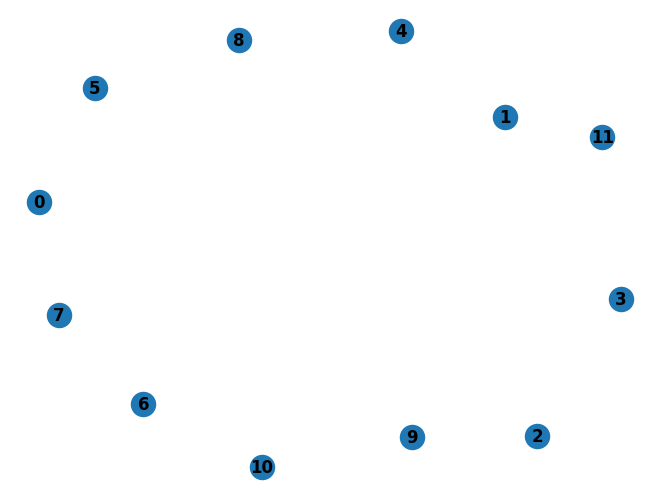

In [64]:
nx.draw(rfgraph, with_labels=True, font_weight='bold')

In [76]:
perimeters = []
for n in rfgraph.nodes(data=True):
    coords = n[1]['coordinates']
    perimeter = []
    for point in coords:
        perimeter.append([point['x'], point['y']])
    perimeters.append(perimeter)
    print(perimeter)

[[33.69, 11.16], [33.69, 14.16], [36.4, 14.16], [36.4, 11.16], [33.69, 11.16]]
[[33.69, 14.16], [33.69, 15.58], [36.4, 15.58], [36.4, 14.16], [33.69, 14.16]]
[[33.69, 15.58], [33.69, 18.29], [36.4, 18.29], [36.4, 15.58], [33.69, 15.58]]
[[36.4, 11.16], [40.65, 11.16], [40.65, 15.65], [40.65, 18.39], [36.4, 18.29], [36.4, 15.58], [36.4, 14.16], [36.4, 11.16]]
[[40.65, 15.65], [44.04, 15.65], [44.04, 11.16], [40.65, 11.16], [40.65, 15.65]]
[[44.04, 15.65], [44.04, 18.32], [49.3, 18.32], [49.3, 16.52], [49.3, 14.16], [49.27, 11.2], [44.04, 11.16], [44.04, 15.65]]
[[40.65, 18.39], [40.65, 20.94], [44.07, 20.94], [44.04, 18.32], [44.04, 15.65], [40.65, 15.65], [40.65, 18.39]]
[[49.27, 11.2], [52.56, 11.2], [52.56, 14.13], [49.3, 14.16], [49.27, 11.2]]
[[52.56, 14.13], [52.56, 15.36], [52.56, 16.52], [49.3, 16.52], [49.3, 14.16], [52.56, 14.13]]
[[52.56, 16.52], [52.56, 18.29], [49.3, 18.32], [49.3, 16.52], [52.56, 16.52]]
[[52.56, 11.2], [56.36, 11.2], [56.36, 15.45], [52.56, 15.36], [52.56

In [97]:
edges = []
for per1 in perimeters:
    px = perimeters.index(per1)
    for per2 in perimeters:
        lx = perimeters.index(per2) 
        if per1 != per2:
            common_points = set()
            # print(f'common_points {common_points}, type: {type(common_points)}')
            for p in range(len(per1)):
                # for l in range(len(per2)):                        
                if per1[p] in per2:
                    common_points.add(p)
            if len(common_points)>1:
                edges.append([px,lx])
edges


[[0, 1],
 [0, 3],
 [1, 0],
 [1, 2],
 [1, 3],
 [2, 1],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 4],
 [3, 6],
 [4, 3],
 [4, 5],
 [4, 6],
 [5, 4],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [6, 3],
 [6, 4],
 [6, 5],
 [7, 5],
 [7, 8],
 [7, 10],
 [8, 5],
 [8, 7],
 [8, 9],
 [8, 10],
 [8, 11],
 [9, 5],
 [9, 8],
 [9, 11],
 [10, 7],
 [10, 8],
 [10, 11],
 [11, 8],
 [11, 9],
 [11, 10]]

In [98]:
rfgraph.add_edges_from(edges)

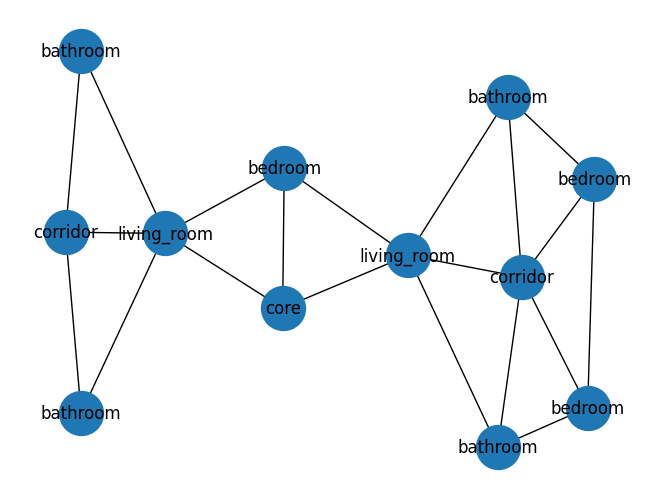

In [104]:
labels = nx.get_node_attributes(rfgraph, 'room_type') 
nx.draw(rfgraph,labels=labels,node_size=1000)
#nx.draw(rfgraph, with_labels=True, font_weight='bold')

In [102]:
rfgraph.nodes[0]

{'room_type': 'bathroom',
 'apartment': 'Apartment 1',
 'coordinates': [{'x': 33.69, 'y': 11.16, 'z': 0},
  {'x': 33.69, 'y': 14.16, 'z': 0},
  {'x': 36.4, 'y': 14.16, 'z': 0},
  {'x': 36.4, 'y': 11.16, 'z': 0},
  {'x': 33.69, 'y': 11.16, 'z': 0}]}

In [95]:
common_points

{14.16}

In [ ]:
rfgraph.add_node(id, room_type=name, apartment=apartment, coordinates=coordinates)

<generator object node_attribute_xy at 0x000002769E4029D0>

In [46]:
s

{'room_type': 'bathroom',
 'apartment': 'Apartment 1',
 'coordinates': [{'x': 33.69, 'y': 11.16, 'z': 0},
  {'x': 33.69, 'y': 14.16, 'z': 0},
  {'x': 36.4, 'y': 14.16, 'z': 0},
  {'x': 36.4, 'y': 11.16, 'z': 0},
  {'x': 33.69, 'y': 11.16, 'z': 0}]}

In [11]:
rf1_original = nx.read_graphml(path + 'ReferenceDesign_01/updated_walls_and_rooms_graph(internal).graphml') 
rf1 = nx.read_graphml(path + 'ReferenceDesign_01/updated_walls_and_rooms_graph(internal)_snapped.graphml')

In [10]:
for n in rf1.nodes:
    node = rf1.nodes[n]
    try:
        name = node['name']
        if name == 'bathroom':
            print(n, node)
        else:
            print (n, name)
    except KeyError:
        pass

room1 {'type': 'room', 'name': 'bathroom', 'apartment': 'Apartment 1'}
apartment1 Apartment 1
room2 corridor
room3 living_room
room4 bedroom
room5 living_room
apartment2 Apartment 2
room6 core
room7 {'type': 'room', 'name': 'bathroom', 'apartment': 'Apartment 2'}
room8 corridor
room9 bedroom


In [12]:
for n in rf1_original.nodes:
    node = rf1_original.nodes[n]
    try:
        name = node['name']
        if name == 'bathroom':
            print(n, node)
        else:
            print (n, name)
    except KeyError:
        pass

room1 {'type': 'room', 'name': 'bathroom', 'apartment': 'Apartment 1'}
apartment1 Apartment 1
room2 corridor
room3 living_room
room4 bedroom
room5 living_room
apartment2 Apartment 2
room6 core
room7 {'type': 'room', 'name': 'bathroom', 'apartment': 'Apartment 2'}
room8 corridor
room9 bedroom
